In [1]:
# perform a permutation test in Python
# Callin Switzer



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
# Preliminary (made up) data
dat = pd.DataFrame({"AnimalID": ["a", "b", "c", "d", "e", "f", "g", "h"], 
                    "Treatment": ["ctrl", "trt", "ctrl", "trt", "ctrl", "trt", "ctrl", "trt"], 
                    "value": [0, 2, -2, 3, 1, 12, 4, 9]})
dat

,AnimalID,Treatment,value
0,a,ctrl,0
1,b,trt,2
2,c,ctrl,-2
3,d,trt,3
4,e,ctrl,1
5,f,trt,12
6,g,ctrl,4
7,h,trt,9


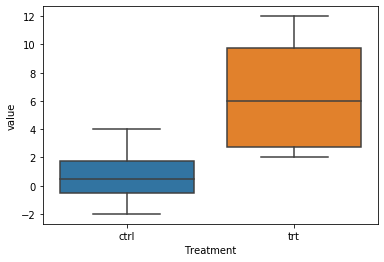

In [53]:
# plot data
sns.boxplot(x= "Treatment", y = "value", data = dat)
plt.show()

In [54]:
test_stat = np.mean(dat.value[dat.Treatment == "ctrl"]) - np.mean(dat.value[dat.Treatment == "trt"]) 

In [79]:
# report your calculated test statistic
test_stat

-5.75

In [84]:
# resample
def null_perm_test():
    null_trt = np.random.choice(dat.Treatment, replace = False, size = len(dat.Treatment))
    null_test_stat = np.mean(dat.value[null_trt == "ctrl"]) - np.mean(dat.value[null_trt == "trt"]) 
    return(null_test_stat)

# resample 10000 times to generate sampling distribution under the null hypothesis
null_dist = np.array([null_perm_test() for ii in range(10000)])

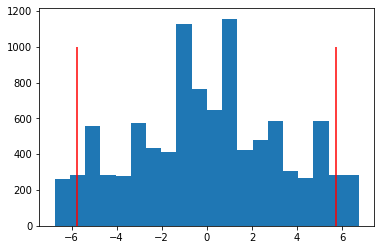

In [85]:
# plot test statistic (positive and negative) on sampling distribution
plt.hist(null_dist, bins= 20)
plt.vlines(x = test_stat, ymin = 0, ymax =1000, color = "red")
plt.vlines(x = -test_stat, ymin = 0, ymax =1000, color = "red")
plt.show()

In [86]:
# calculate a p-value
pval = np.mean((null_dist <= test_stat) | (-test_stat <= null_dist) )
pval

0.1118